# 9장 스택, 큐

- 스택 : Last-In-First-Out (후입선출)
  - 잔뜩 쌍아둔 접시를 떠올려보면 좋습니다. 마지막에 쌓은 접시가 맨 위에 놓이겠지요??
- 큐 : First-In-First-Out (선입선출)
  - 큐는 맛집에 입장하기 위해 줄을 서는 것을 떠올려 보세요. 가장 먼저 줄을 선 사람이 가장 먼저 입장을 할 것입니다.

### 스택

> 스택 Stack 은 다음과 같은 2가지 주요 연산을 지원하는 요소의 컬렉션으로 사용 되는 추상 자료형이다.
> - push() : 요소를 컬렉션에 추가한다.
> - pop() : 아직 제거되지 않은 가장 최근에 삽입된 요소를 제거한다.



In [2]:
# 연결 리스트를 이용한 스택 ADT 구현

class Node:
  def __init__(self, item, next): # 초기화 함수 __init__()에서 노드의 값은 item으로, 다음 노드를 가르키는 포인터는 next로 정의합니다.
    self.item = item
    self.next = next

class Stack:
  def __init__(self):
    self.last = None

  def push(self, item): # push() : 연결 리스트에 요소를 추가하면서 가장 마지막 값을 next로 지정하고, 포인터인 last는 가장 마지막으로 이동시킨다.
    self.last = Node(item, self.last)

  def pop(self): # pop() : 가장 마지막 아이템을 끄집어내고 last 포인터를 한 칸 앞으로 전진시킨다. 즉, 이전에 추가된 값을 가리키게한다.
    item = self.last.item
    self.last = self.last.next
    return item

In [3]:
stack = Stack()
stack.push(1)
stack.push(2)
stack.push(3)
stack.push(4)
stack.push(5)

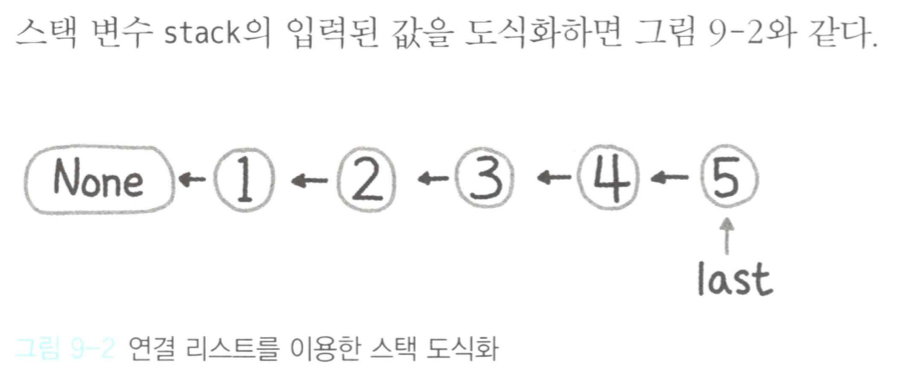

In [4]:
print(stack)

In [5]:
for _ in range(5):
  print(stack.pop())

5
4
3
2
1


가장 최근에 입력된 순서대로, 즉 LIFO 순으로 잘 출력되는 것을 확인할 수 있습니다.

이렇게 연결 리스트를 이용해 스택 ADT를 어렵지 않게 구현할 수 있습니다.

### 20. 유효한 괄호

괄호로 된 입력값이 올바른지 판별하라.

- 입력 : ()[]{}

- 출력 : True

### 풀이 1. 스택 일치 여부 판별

(, [, { 는 스택에 push 하고, ), ], }를 만날 때 스택에서 pop 한 결과가 매핑 테이블 결과와 매칭되는 지 확인하면 된다.

여기서는 먼저 매핑 테이블을 만들어 놓고 테이블에 존재하지 않으면 무조건 푸시하고, 팝했을 때 결과가 일치하지 않으면 False를 리턴하도록 다음과 같이 구현했다.

In [72]:
def is_valid(s):
  stack = []
  table = {
    ')': '(',
    ']': '[',
    '}': '{'
  }
 
  # 스택 이용 예외 처리 및 일치 여부 판별
  for char in s:
    if char not in table: # 스택이 비어 있는지 여부 확인
      stack.append(char)
    elif not stack or table[char] != stack.pop(): # pop 결과가 일치하지 않는지 확인하는 것
      return False
 
  return len(stack) == 0 
 
 
s = "()[]{}"
print(is_valid(s))

True


### 21. 중복 문자 제거

중복된 문자를 제외하고 사전식 순서로 나열하라.

예제 1
- input : "bcabc"
- out : "abc

예제 2
- input : "cbacdcbc"
- out : acdb

# 풀이 1. 재귀를 이용한 분리 <- 풀이 이해 X

- 사전식 순서 : 글자 그대로 사전에서 가장 먼저 찾을 수 있는 순서를 말하며, bcabc 에서 중복 문자를 제외하면 사전에서 가장 먼저 찾을 수 있는 문자열은 abc가 될 것입니다.

만약 앞에 e 문자가 하나 더 붙은 ebcabc가 입력값이라면 eabc가 될 것입니다.

e 문자 자체는 해당 문자열 내에서 사전 순으로는 가장 뒤에 있지만, e는 입력값에서 딱 한 번만 나타나고, a, b, c는 뒤이어 등장하기 때문에 e의 위치를 변경할 수 없기 때문입니다.

반면 입력값이 ebcabce라면 첫 번째 e는 중복으로 제거할 수 있고 마지막 e를 남겨서, 결과는 abce가 될 수 있을 것입니다.

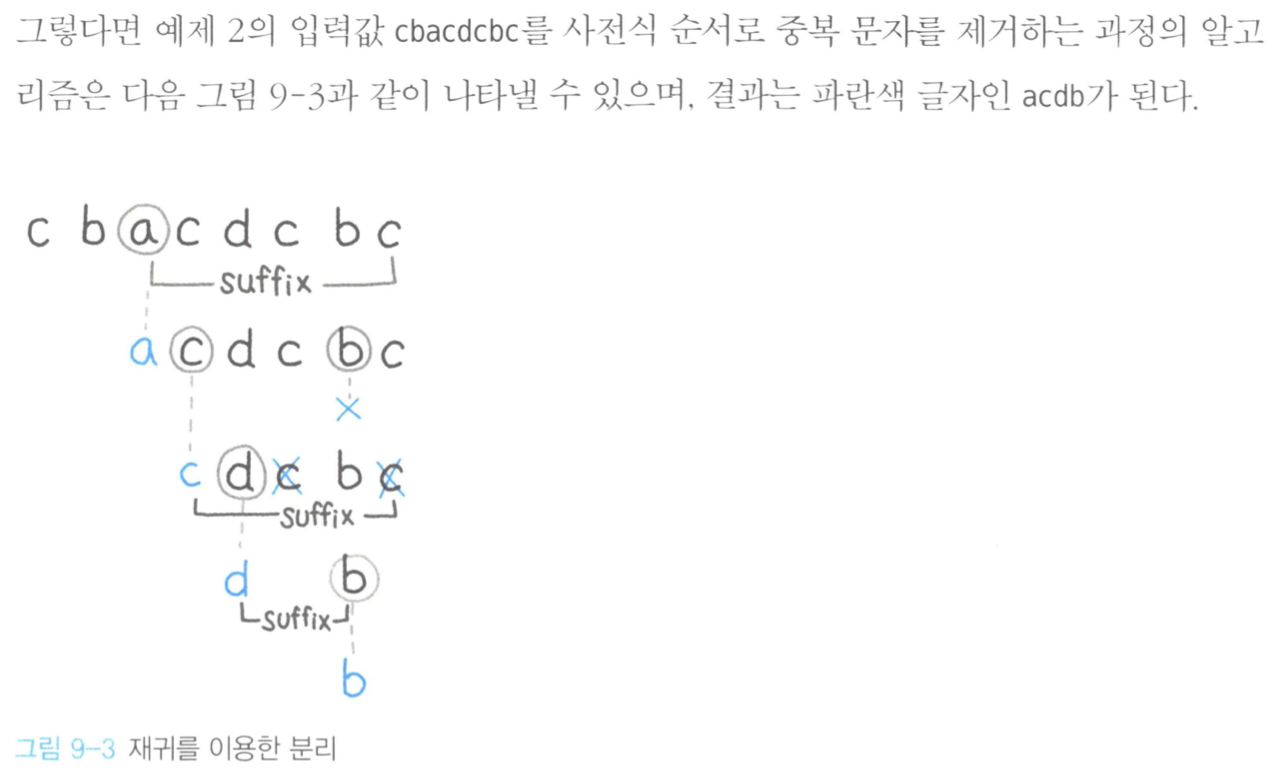

In [73]:
def remove_duplicate_letters1(s):
  # 집합으로 정렬
  for char in sorted(set(s)): # 알파벳 순으로 문자열 입력값을 모두 정렬
    suffix = s[s.index(char):] # 가장 빠른 a 부터 접미사 suffix를 분리하여 확인

    # 전체 집합과 접미사 집합이 일치하는지 여부로 판별 후, 일치할 때 분리 진행 
    if set(s) == set(suffix): 
      return char + remove_duplicate_letters(suffix.replace(char, ''))
  return ''
  
s = "bcabc"
print(remove_duplicate_letters1(s))

abc


In [74]:
s = "ebcabc"
print(remove_duplicate_letters1(s))

eabc


In [75]:
s = "cbacdcbc"
print(remove_duplicate_letters1(s))

acdb


In [76]:
s = "cdfbcdabc"
print(remove_duplicate_letters1(s))

cdfab


### 풀이 2. 스택을 이용한 문자 제거

'중복 문자 제거' 문제를 이 장에서 다루는 이유는 스택을 이용해서 풀 수 있기 때문입니다.

stack.append(char)  
seen.add(char)

먼저 스택에는 이 코드와 같이 앞에서 부터 차례대로 쌓아 나갑니다.

만약 현재 문자 char가 스택에 쌓여 있는 문자 (이전 문자보다 앞선 문자) 이고, 뒤에 다시 붙일 문자가 남아 있다면 (카운터가 0 이상이라면), 쌓아둔 걸 꺼내서 없애줍니다.

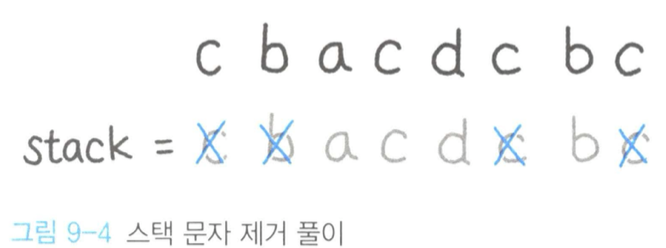

In [17]:
import collections
 
def remove_duplicate_letters2(s):
  counter, seen, stack = collections.Counter(s), set(), []
 
  for char in s:
    counter[char] -= 1
    if char in seen:
      continue
 
    # 뒤에 붙일 문자가 남아 있다면 스택에서 제거
    while stack and char < stack[-1] and counter[stack[-1]] > 0:
      seen.remove(stack.pop())
    stack.append(char)
    seen.add(char)
 
  return ''.join(stack) 
  
s = "bcabc"
print(remove_duplicate_letters2(s))

abc


In [18]:
s = "ebcabc"
print(remove_duplicate_letters2(s))

eabc


In [19]:
s = "cbacdcbc"
print(remove_duplicate_letters2(s))

acdb


### 22. 일일 온도

매일의 화씨 온도 리스트 T를 입력받아서, 더 따뜻한 날씨를 위해서는 며칠을 더 기다려야하는 지 출력하라.

- input : T = [73, 74, 75, 71, 69, 72, 76, 73]

- out : [1, 1, 4, 2, 1, 1, 0, 0]

- 설명 : 화씨 73도인 첫 날에서 더 따뜻한 날을 위해서는 하루만 기다리면 된다. 바로 다음날인 둘째 날은 화씨 74도다. 마찬가지로 더 따뜻한 날을 위해서는 셋째 날까지 하루만 기다리면 된다. 셋째 날은 화씨 75도 이며 이보다 더 따뜻한 날을 위해서는 4일을 더 기다려야 화씨 76도가 된다. 이후 일곱째 날과 여덜째 날은 더 이상 따뜻한 날이 없으므로 가각 0이다.

### 풀이 1. 스택 값 비교

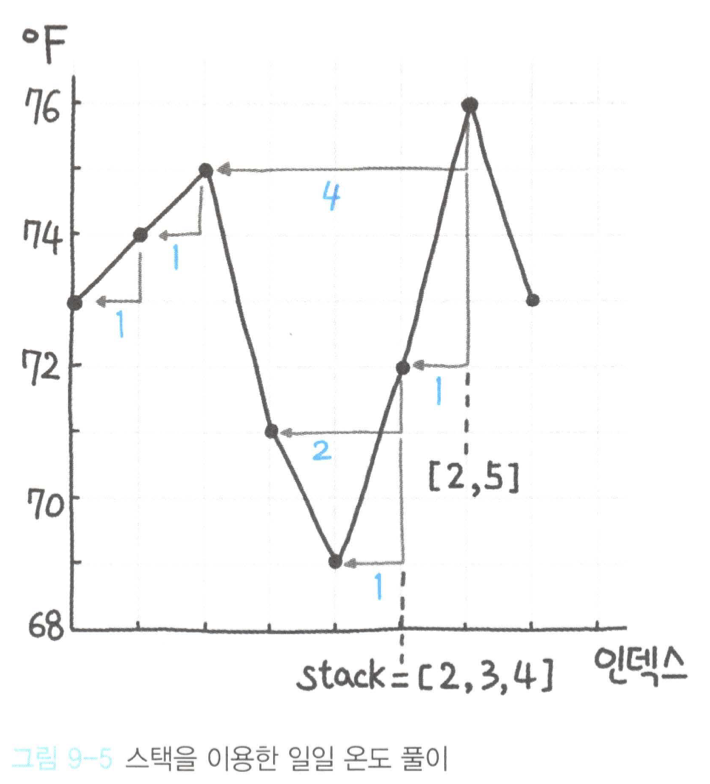



In [20]:
def daily_temperatures(s):
  answer = [0] * len(T)
  stack = []
 
  for i, cur in enumerate(T):
    while stack and cur > T[stack[-1]]:
      last = stack.pop()
      answer[last] = i - last
 
    stack.append(i)
  return answer
 
T = [73, 74, 75, 71, 69, 72, 76, 73]
print(daily_temperatures(T))

[1, 1, 4, 2, 1, 1, 0, 0]


### 큐

> 큐 (Quene)는 시퀀스의 한쪽 끝에는 NTT를 추가하고, 다른 반대쪽 끝에는 제거할 수 있는 엔티티 컬렉션입니다.

### 23. 큐를 이용한 스택 구현

큐를 이용해서 다음 연산을 지원하는 스택을 구현하라.

- push(x) : 요소 x를 스택에 삽입한다.
- pop(): 스택의 첫 번째 요소를 삭제한다.
- top() : 스택의 첫 번째 요소를 가져온다.
- empty() : 스택이 비어 있는지 여부를 리턴한다.

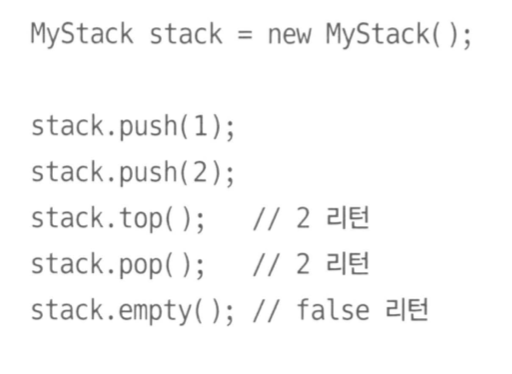

### 풀이1. push()할 때 큐를 이용해서 재정립

In [77]:
import collections
 
class my_stack:
  def __init__(self): # 스택 객체 생성
    self.q = collections.deque() # deque()를 사용해서 stack 구현
 
  def push(self, x): # 스택 요소 추가 push (.append()) -> 큐에서 맨 앞 요소를 끄집어낼 때 스택처럼 가장 먼저 삽인한 요소가 나오게 될 것입니다.
    self.q.append(x)
    # 요소 삽입 후 맨 앞에 두는 상태로 재정렬
    for _ in range(len(self.q) - 1): 
      self.q.append(self.q.popleft()) # 큐에서 맨 앞 요소를 끄집어 낼 수 있도록 왼쪽에다가 삽입
 
  def pop(self): # 스택 요소 삭제 pop()
    return self.q.popleft()
 
  def top(self): # 스택 맨 앞 요소 리턴
    return self.q[0]
 
  def empty(self): # 스택이 비었는지 확인 (비었다면 True 리턴)
    return len(self.q) == 0

stk = my_stack() # stack 객체 생성
print(stk) # stack object 생성 확인

In [25]:
print(stk.empty()) # 처음에는 아무것도 들어 있지 않으므로 True 출력

True


In [79]:
stk.push(1) # stk 에 1을 넣어줌 :[1]
stk.push(2) # stk 에 2을 넣어줌 :[2, 1]
print(stk.q)

deque([2, 1, 1])


In [80]:
print(stk.pop()) # stk 에서 2가 꺼내지면서 출력 : 2 / [1]

2


In [81]:
print(stk.top()) # stk 맨 앞 값 출력 : 1

1


In [82]:
print(stk.empty()) # 비어 있지 않으므로 False 출력

False


In [83]:
print(stk.pop()) # stk 에서 1이 꺼내지면서 출력 : 1 / []

1


In [85]:
print(stk.pop()) # stk 에서 1이 꺼내지면서 출력 : 1 / []

1


In [86]:
print(stk.empty()) # 객체에 아무것도 들어 있지 않으므로 True 출력

True


### 24. 스택을 이용한 큐 구현

스택을 이용해서 다음 연산을 지원하는 큐를 구현하라.

- push(x) : 요소 x를 큐 마지막에 삽입한다.
- pop() : 큐 처음에 있는 요소를 제거한다.
- peek() : 큐 처음에 있는 요소를 조회한다.
- empty() : 큐가 비어 있는지 여부를 리턴한다. 

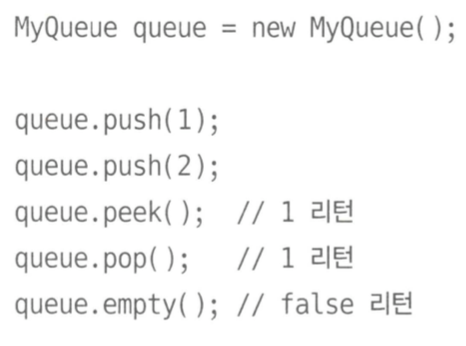

### 풀이1. 스택 2개 사용

In [32]:
class my_queue:
  def __init__(self): 
    self.input = [] # 
    self.output = [] # 
 
  def push(self, x): # 앞서와 달리 push()는 간단합니다.
    self.input.append(x)
 
  def pop(self): # [1, 2, 3]
    self.peek()
    return self.output.pop()
 
  def peek(self): # 위에서 구현한 것보다 복잡한 형태로 구현되었음을 확인할 수 있습니다.
    # output이 없으면 모두 재입력
    if not self.output:
      while self.input:
        self.output.append(self.input.pop())
    return self.output[-1]
 
  def empty(self):
    return self.input == [] and self.output == []

que = my_queue() # queue 객체 생성
print(que) # que object 생성 확인

In [87]:
print(que.empty()) # 처음에는 아무것도 들어 있지 않으므로 True 출력

True


In [88]:
que.push(1) # que 에 1 넣음 : [1]
que.push(2) # que 에 2 넣음 : [1, 2]
print(que.input)
# print(que.output)

[1, 2]


In [89]:
print(que.pop()) # que에서 1이 꺼내지면서 출력 : 1 / [2]

1


In [90]:
print(que.peek()) # que 맨 앞 값 출력 : 2

2


In [91]:
print(que.empty()) # 비어 있지 않으므로 False 출력

False


In [92]:
print(que.pop()) # que에서 2가 꺼내지면서 출력 : 2 / []

2


In [93]:
print(que.pop())

IndexError: ignored

In [44]:
print(que.pop()) # 왜 또 1이 나오는 거지??

1


In [45]:
print(que.pop()) # 드디어 que 에서 2가 꺼내지면서 출력 : 2 / [] -> 이제 que 가 빈 상태

2


In [94]:
print(que.empty()) # 비어 있으므로 True 출력 -> ??? 왜 False 가 나오지??

True


### 아래에 다시하니깐 됨.. 이유가 무엇이었을까요??

In [47]:
print(que.input)
print(que.output)

[1, 2]
[]


In [48]:
print(que)

In [49]:
print(que.pop())

1


In [51]:
print(que.pop())

2


In [52]:
print(que.pop())

IndexError: ignored

In [53]:
print(que.empty())

True


### 25. 원형 큐 디자인

원형 큐를 디자인하라.

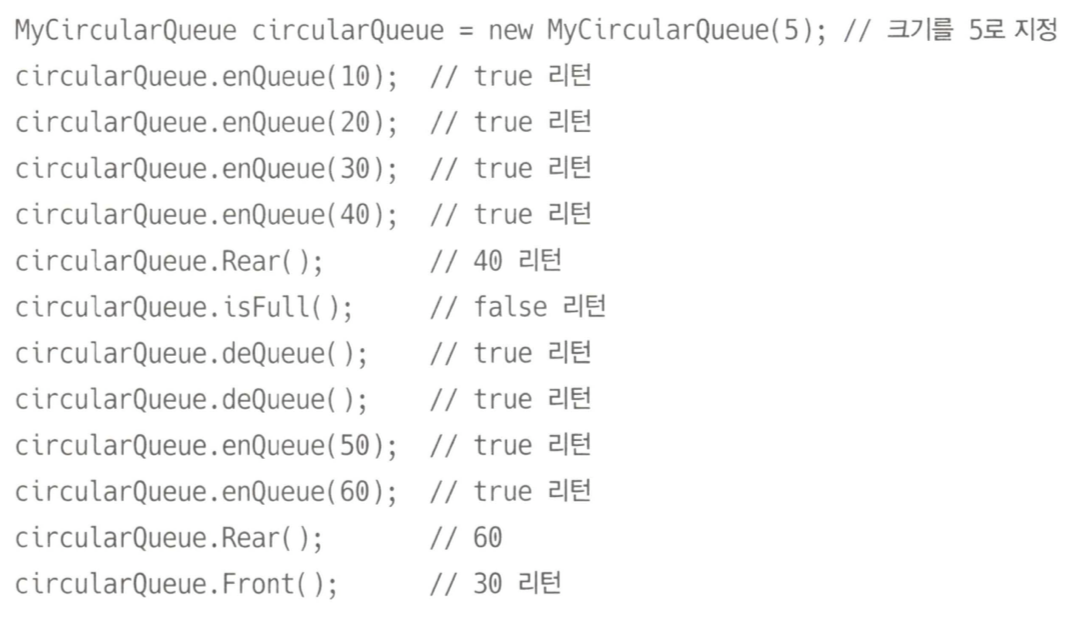

### 풀이 1. 배열을 이용한 풀이

원형 큐 (Circular Queue)라는 명칭은 생소할 수도 있을 거 같습니다.

'원형큐'는 FIFO 구조를 지닌다는 점에서 기존의 큐와 동일합니다.

하지만, 마지막 위치가 시작한 위치와 연결되는 다음 아래의 그림과 같은 원형 구조를 띠기 때문에, 링 버퍼 (Ring Buffer)라고도 부릅니다.


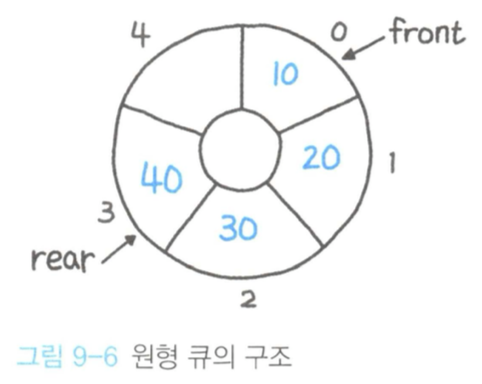

기존의 큐는 공간이 꽉 차게 되면 더 이상 요소를 추가할 수 없었습니다.

심지어 앞쪽에 요소 들이 deQueue()로 모두 빠져서 충분한 공간이 남게 돼도 그쪽으로는 추가할 수 있는 방법이 없었습니다.

그래서 앞쪽에 공간이 남아 있다면, 위의 그림처럼 동그랗게 연결해 앞쪽으로 추가할 수 있도록 재활용 가능한 구조가 바로 원형 큐입니다.

원형 큐의 삽입과 삭제 원리는 아래의 그림과 같습니다.

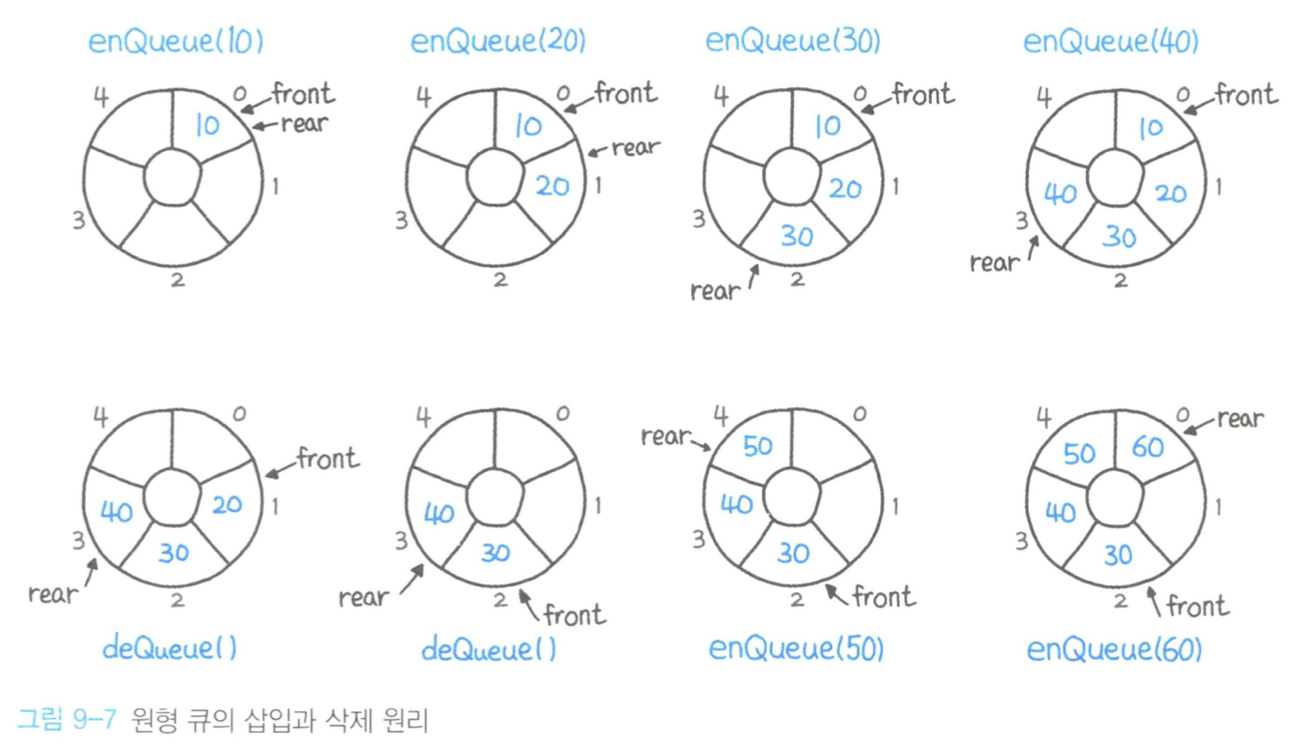


동작하는 원리는 투 포인터와 비슷합니다.

마지막 위치와 시작 위치를 연결하는 원형 구조를 만들고, 시작점과 끝점을 따라 투 포인터가 움직입니다.

위의 그림처럼 enQueue()를 하게 되면 rear포인터가 앞으로 이동하고, deQueue()를 하게 되면 front 포인터가 앞으로 이동합니다.

이렇게 enQueue()와 deQueue()를 반복하게 되면 서로 동그랗게 연결되어 있기 때문에 투 포인터가 빙글빙글 돌면서 이동하는 구조가 압니다.

이 그림의 enQueue(60) 이후에는 rear 포인터가 원래의 front 포인터 자리까지 도달해 빙글빙글 돌고 있는 모습을 확인할 수 있습니다.

만약 rear 포인터가 front 포인터와 같은 위치에서 서로 만나게 된다면, 다시 말해 만나는 위치까지 이동했다면, 그때는 정말 여유 공간이 하나도 없다는 의미이므로, 공간 부족 에러를 발생시킵니다.

In [1]:
class my_circular_queue:
  # __init__를 사용해서 큐의 크기 k를 입력값으로 받습니다.
  def __init__(self, k):
    self.q = [None] * k
    self.maxlen = k # k 값은 당연히 최대 길이인 maxlen이 되고,
    self.p1 = 0 # front 포인터는 p1으로 정하고
    self.p2 = 0 # rear 포인터는 p2로 정하고 초깃값은 0으로 합니다.
 
  # enQueue(): Rear 포인터 이동
  def enQueue(self, value):
    if self.q[self.p2] is None:
      self.q[self.p2] = value # rear 포인터 p2 위치에 값을 넣고, 포인터를 한 칸 앞으로 이동합니다.
      self.p2 = (self.p2 + 1) % self.maxlen # 단, 전체 길이만큼 모듈로 (나머지) 연산을 하여 포인터의 위치가 전체 긿이를 벗어나지 ㅇ낳게 합니다.
      return True
    else: # 만약 rear 포인터 위치가 None이 아니라면 다른 요소가 있는 공간이 꽉 찬 상태이거나 비정상적인 경우이므로 False를 리턴합니다.
      return False
 
  # deQueue(): Front 포인터 이동
  def deQueue(self): # 요소를 꺼내지 않고 삭제만 수행하도록 정의합니다.
    if self.q[self.p1] is None: # front 포인터 p1의 위치에 None을 넣어 삭제를 하고, 포인터를 한 칸 앞으로 이동합니다.
      return False
    else:
      self.q[self.p1] = None
      self.p1 = (self.p1 + 1) % self.maxlen # 다음으로 최대 길이를 넘지 않도록 합니다.
      return True
 
  # Front() : Front 위치 확인
  def Front(self):
    return -1 if self.q[self.p1] is None else self.q[self.p1]
 
  # Rear() : Rear 위치 확인
  def Rear(self):
    return -1 if self.q[self.p2 - 1] is None else self.q[self.p2 -1]
 
  # isEmpty() : 원형 큐가 비어 있는지 확인
  def isEmpty(self):
    return self.p1 == self.p2 and self.q[self.p1] is None
 
  # isFull() : 원형 큐가 가득 차 있는지 확인
  def isFull(self):
    return self.p1 == self.p2 and self.q[self.p1] is not None

cir = my_circular_queue(5) # my_circular_queue 객체 생성
print(cir) # my_circular_queue object 생성 확인

In [2]:
print(cir.isEmpty()) # 처음에는 아무것도 들어있지 않으므로 True 출력

True


In [4]:
# cir.enQueue(10) # cir 에 10 넣음 [10, None, None, None, None]
cir.enQueue(20) # cir 에 20 넣음 [10, 20, None, None, None]
cir.enQueue(30) # cir 에 30 넣음 [10, 20, 30, None, None]
cir.enQueue(40) # cir 에 40 넣음 [10, 20, 30, 40, None]
print(cir.q)

[10, 20, 30, 40, None]


In [5]:
print(cir.Rear()) # 현재 Rear 포인터 위치 확인

40


In [6]:
print(cir.Front()) # 현재 Front 포인터 위치 확인

10


In [7]:
print(cir.isFull()) # 아직 큐가 가득 차지 않았으므로 False 출력

False


In [8]:
cir.deQueue() # 10에 front 가 있으므로 10 제거
print(cir.q)

[None, 20, 30, 40, None]


In [9]:
cir.deQueue() # 20에 front 가 있으므로 20 제거
print(cir.q)

[None, None, 30, 40, None]


In [10]:
cir.deQueue() # 30에 front 가 있으므로 20 제거
print(cir.q)

[None, None, None, 40, None]


In [11]:
cir.enQueue(50) # cir 에 50 넣음 [None, None, None, 40, 50]
cir.enQueue(60) # cir 에 60 넣음 [60, None, None, 40, 50]
cir.enQueue(70) # cir 에 70 넣음 [60, 70, None, 40, 50]
cir.enQueue(80) # cir 에 70 넣음 [60, 70, 80, 40, 50]
print(cir.q)

[60, 70, 80, 40, 50]


In [12]:
print(cir.Rear()) # 현재 Rear 포인터 위치 확인

80


In [13]:
print(cir.Front()) # 현재 Front 포인터 위치 확인

40


In [14]:
print(cir.isFull()) # 현재 cir이 가득 차 있으므로, True가 나옵니다.

True
